# Project Investigate a Dataset: "No-show appointments"

## Table of Contents

<ul>
<li><a href="#intro">Introductions</a></li>
<li><a href="#datawrang">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conc">Conclusions</a></li>
</ul>

<a id = "intro"></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
I selected this dataset because I'm from Brazil and I can analyse a real issue that happens here. Another factor, is that this scholarship (Bolsa Família) raises several discussions about its effectiveness and I am interested to discover whether this is related to no show to appointments or not.

Other things that I want to discover by investigating this dataset is whether:
- age is an important factor;
- men have more no show to appointments than women;
- a person with a disease or special condition tend to not miss the appointment or not;
- the strategy to send a SMS to remember the appointment works or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id = "datawrang"></a>
## Data Wrangling

### General Properties

First I will import the dataset set that I am going to use and I will write some functions to see whats this dataset looks like.

In [2]:
noshow_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
noshow_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
noshow_df.duplicated().sum()

0

### Data Cleaning

As we can see our dataset is composed of 14 columns and 110,527 rows and there is no missing values and no duplicated rows.
There are manly two things that seems to be a problem. First  is that the type of the columns ScheduledDay and AppointmentDay are as strings. So we have to convert these to datetime.
The second is that is better to change the name of the last column 'No-show' to 'No_show' to avoid any future problems.
Other than that all types of data seems to be correct.

First, let's change the type of data from the ScheduledDay and AppointmentDay.

In [6]:
noshow_df['ScheduledDay'] = pd.to_datetime(noshow_df['ScheduledDay'])
noshow_df['AppointmentDay'] = pd.to_datetime(noshow_df['AppointmentDay'])

In [7]:
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

These seems to be right now.

Now let's change the name for the last column

In [8]:
noshow_df = noshow_df.rename(columns = {'No-show':'No_show'})
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


It would be better if all columns had only lowercase letters, which could avoid errors when typing the column names. We can also remove possible white spaces at the beginning and end of the name. We will change this too.

In [9]:
noshow_df.rename(columns = lambda x: x.strip().lower(), inplace = True)
noshow_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


When I was starting the next step (Exploratory Data Analysis) in my first notebook (draft notebook) I noticed that at the column "age" there is one row with the age -1, which does not exists, so let's remove this row from our dataset.

First we have to know where this row is and then delete it.

In [10]:
noshow_df.query('age == -1')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
noshow_df.drop(99832, inplace = True)
noshow_df.query('age ==-1')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [12]:
noshow_df.shape

(110526, 14)

Now our dataset is with 110,526 rows as we can see above

<a id = "eda"></a>
## Exploratory Data Analysis

Now that we cleaned up our data, we can start with the exploratory analysis.

But before I start to answering the questions, I would like to see how are the number for attendance and absence.

In [13]:
total_attendance = noshow_df.query('no_show == "No"').count().max()
total_attendance

88207

In [14]:
total_absence = noshow_df.query('no_show == "Yes"').count().max()
total_absence

22319

Now let's see the proportion of this with the help of a pie chart.

Attended    88207
Missed      22319
dtype: int64

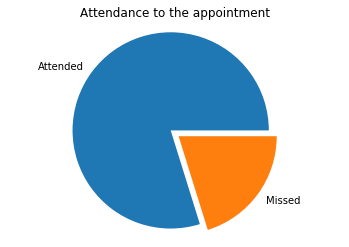

In [42]:
size = [total_attendance, total_absence]
labels = ['Attended', 'Missed']
explode = [0.0, 0.1]
plt.pie(size, explode = explode, labels = labels)
plt.axis('equal')
plt.title('Attendance to the appointment');

attendance = pd.Series({'Attended': total_attendance, 'Missed': total_absence})
attendance

In [16]:
(total_absence / (total_attendance+total_absence))*100

20.193438647919944

We can see that about 20% of our total dataset missed the appointment. Let1s now see which factors have more influence on this.

### Question 01: Is age is an important factor?

We will start by answering whether age is an important factor or not. But first, let's see some general information about our sample's age.



,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,71839.0,38.894542,22.154889,0.0,21.0,39.0,56.0,115.0
M,38687.0,33.736863,24.435221,0.0,10.0,33.0,54.0,100.0


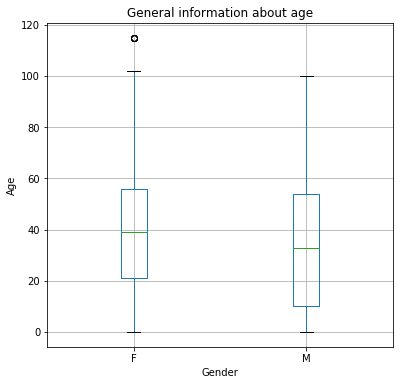

In [43]:
noshow_df.boxplot(column = ['age'], by=['gender'], figsize=(6,6))
plt.title('General information about age')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Age');

pd.DataFrame(noshow_df.groupby('gender')['age'].describe())

Our sample has an average age of ~38 years for women and ~34 years for men, being relatively compound of young people, with 75% of the sample under 56 years and 54 years for women and men respectively.

I thought that it would be better if I create another column with a group of ages. Then I divided into 12 groups with a 10 years space (0-10, 10-20 and so on).

In [17]:
noshow_df['age_group'] = pd.cut(noshow_df['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120'])
noshow_df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-70
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-60
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-70
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-10
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-60


In [18]:
noshow_df['age_group'].value_counts()

50-60      15661
0-10       15210
30-40      15052
40-50      14420
20-30      13783
10-20      13099
60-70      11189
70-80       5721
80-90       2544
90-100       301
110-120        5
100-110        2
Name: age_group, dtype: int64

Now we can plot a chart with this information

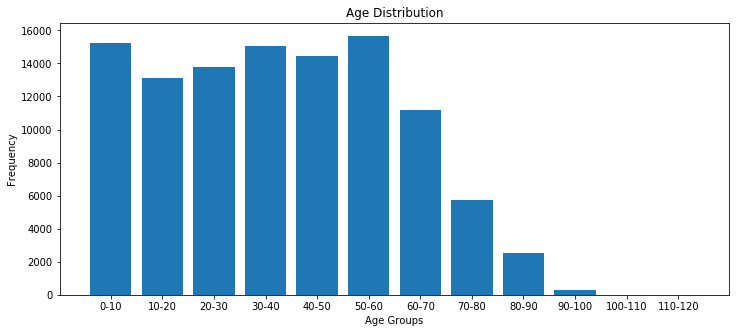

In [19]:
xlabels = ['50-60', '0-10', '30-40', '40-50', '20-30', '10-20', '60-70', '70-80', '80-90', '90-100', '110-120', '100-110']
yvalues = noshow_df['age_group'].value_counts()
plt.subplots(figsize= (12,5))
plt.bar([6,1,4,5,3,2,7,8,9,10,12,11], yvalues, tick_label = xlabels)
plt.title('Age Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Frequency');

By using .groupby() we can see how many people of each group went to the appointments or not.

In [20]:
noshow_df.groupby(['age_group'])['no_show'].value_counts()

age_group  no_show
0-10       No         12061
           Yes         3149
10-20      No          9791
           Yes         3308
20-30      No         10389
           Yes         3394
30-40      No         11820
           Yes         3232
40-50      No         11550
           Yes         2870
50-60      No         12940
           Yes         2721
60-70      No          9541
           Yes         1648
70-80      No          4832
           Yes          889
80-90      No          2137
           Yes          407
90-100     No           242
           Yes           59
100-110    No             2
110-120    Yes            3
           No             2
Name: no_show, dtype: int64

For better visualization I used the crosstab function to create a new dataframe of the age groups and whether they attended to the appointment or not.

In [21]:
noshow_age = pd.crosstab(noshow_df['age_group'], noshow_df['no_show'])
noshow_age

no_show,No,Yes
age_group,,
0-10,12061,3149
10-20,9791,3308
20-30,10389,3394
30-40,11820,3232
40-50,11550,2870
50-60,12940,2721
60-70,9541,1648
70-80,4832,889
80-90,2137,407


But it would be better if instead total numbers we knew the proportion of these values.

In [22]:
noshow_age = pd.crosstab(noshow_df['age_group'], noshow_df['no_show']).apply(lambda x: x/x.sum(), axis=1)
noshow_age

no_show,No,Yes
age_group,,
0-10,0.792965,0.207035
10-20,0.747462,0.252538
20-30,0.753755,0.246245
30-40,0.785278,0.214722
40-50,0.800971,0.199029
50-60,0.826256,0.173744
60-70,0.852712,0.147288
70-80,0.844608,0.155392
80-90,0.840016,0.159984


Now we can plot a bar chart to better see these values.

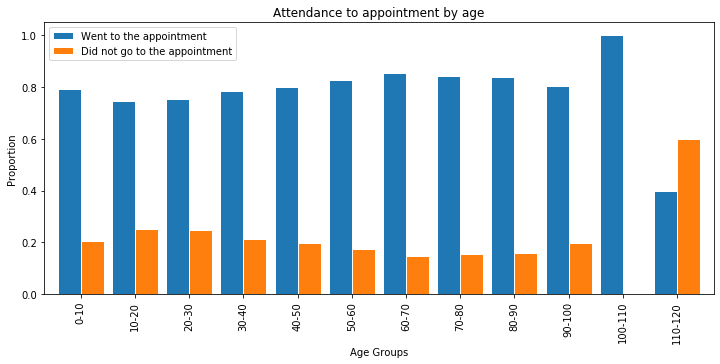

In [23]:
noshow_age.plot(kind = 'bar', width=0.85, edgecolor= 'white', figsize=(12,5))
plt.title('Attendance to appointment by age')
plt.xlabel('Age Groups')
plt.ylabel('Proportion')
plt.legend(['Went to the appointment', 'Did not go to the appointment']);

As we can see, the majority of the age groups stays in the 0.15~0.20 of no attendance, but we have a greater value for people between 10 and 30 years (about 0.25 of no attendance). This indicates that if we are going to run campaigns based on people's age to attend the appointments, we should focus on these two groups.

*Note: although the last two groups had expressive numbers of attendance and no attendance, we only have 2 and 5 people in each group respectively, so with a sample this small it is difficuld to make assumptions.*

### Question 02: Who has more no show to appointments, men or women?

To answer to this question I created a new dataframe where I have the values for 'no_show' and gender. I did this using .groupby and .unpack().

In [24]:
noshow_gender = noshow_df.groupby(['gender', 'no_show'])['no_show'].count().unstack()
noshow_gender

no_show,No,Yes
gender,,
F,57245,14594
M,30962,7725


We can see above the absolute values, but it is better if we look the proportions to see whether men or women have more absences in appointments.

no_show,No,Yes
gender,,
F,0.796851,0.203149
M,0.800321,0.199679


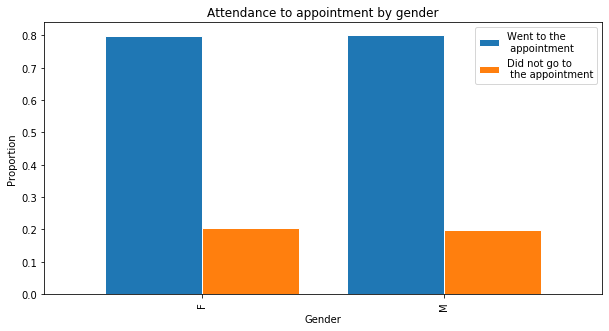

In [44]:
noshow_gender.plot(kind = 'bar', width=0.8, edgecolor= 'white', figsize=(10,5))
plt.title('Attendance to appointment by gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(['Went to the \n appointment', 'Did not go to\n the appointment']);

noshow_gender = noshow_gender.apply(lambda x: x/x.sum(), axis = 1)
noshow_gender

As we can see in the data and in the chart above, both men and women have an absence of about 0.20 in the appointments.

I became interested by other information that we can extract with this data.

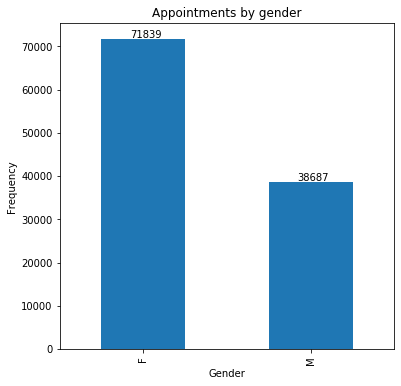

In [27]:
noshow_df.groupby('gender')['gender'].count().plot(kind='bar', figsize = (6,6))
plt.title('Appointments by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.text(x = -0.08, y = 72000, s = noshow_df.query('gender == "F"').gender.count())
plt.text(x = 0.92, y = 39000, s = noshow_df.query('gender == "M"').gender.count());

It is very interesting that the total scheduled appointments by women is almost two times bigger than men (71839 against 38687). According to the official census the brazilian population is made by 51.7% women and 48.3% men, so we do not have a huge discrepancy between women and men that justfy this. 

Is it just that women are more concern with health issues than men? In my opinion this is true and mean should learn to be more concerned with health, but this is just an assumption.

### Question 03: Does a person with a disease or special condition tend to not miss the appointment?

In order to discover the solution to this question first I created a new dataframe with only columns related to this question.

In [28]:
noshow_disease = noshow_df[['hipertension', 'diabetes', 'alcoholism', 'handcap', 'no_show']].copy(deep = True)
noshow_disease.head()

,hipertension,diabetes,alcoholism,handcap,no_show
0,1,0,0,0,No
1,0,0,0,0,No
2,0,0,0,0,No
3,0,0,0,0,No
4,1,1,0,0,No


Now I want to find how many people has a disease or special condition. I can do that by using the .groupby() function and group my data according to people that did not miss the appointment and people who missed the appointment.

In [29]:
noshow_disease.groupby('no_show').sum()

,hipertension,diabetes,alcoholism,handcap
no_show,,,,
No,18029,6513,2683,2006
Yes,3772,1430,677,453


To see this in proportion we can use the same lambda function that we used before, except that this time axis = 0. I will just use an alias to this for when I plot the chart I do not have to type all this code again.

,hipertension,diabetes,alcoholism,handcap
no_show,,,,
No,0.82698,0.819967,0.798512,0.815779
Yes,0.17302,0.180033,0.201488,0.184221


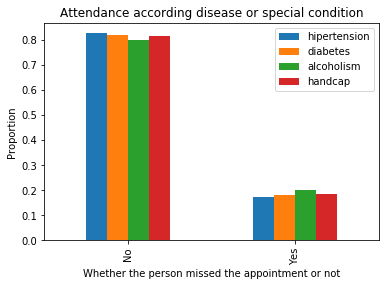

In [45]:
diease_chart.plot(kind = 'bar')
plt.title('Attendance according disease or special condition')
plt.xlabel('Whether the person missed the appointment or not')
plt.ylabel('Proportion');

diease_chart = noshow_disease.groupby('no_show').sum().apply(lambda x: x/x.sum(), axis=0)
diease_chart

We can see with this chart that people who suffers from a disease or have a special condition have an absence of about 0.18, which in my opinion is pretty high. 

For all these groups the one with more absence is from people that have an alcoholism historic with a proportion of ~0.20.

### Question 04: The strategy to send a SMS to remember the appointment works or not?

First I will look how many people received a sms about the appointment.

In [32]:
noshow_df['sms_received'].sum()

35482

Let's find out how much this represents as a percentage of the total population

In [33]:
perc = (noshow_df['sms_received'].sum() / noshow_df['sms_received'].count()) * 100
perc

32.10285362720084

From the people that received a sms we can now see how many attended to the appointment.

In [34]:
noshow_df.groupby('no_show')['sms_received'].sum()

no_show
No     25698
Yes     9784
Name: sms_received, dtype: int64

I discovered the proportion of this by doing the following code:

In [35]:
noshow_sms = (noshow_df.groupby('no_show').sum().apply(lambda x: x / x.sum())) #With this I discovered the proportions for all attributes grouped by the 'no_show' column
noshow_sms = noshow_sms['sms_received'].copy(deep=True) #Then I just copied the only column that matters to this question.
noshow_sms

no_show
No     0.724255
Yes    0.275745
Name: sms_received, dtype: float64

no_show
No     0.724255
Yes    0.275745
Name: sms_received, dtype: float64

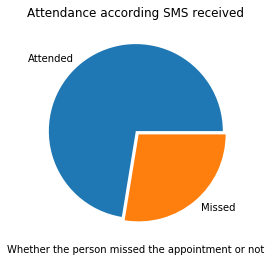

In [56]:
noshow_sms.plot(kind='pie', explode = [0.0, 0.05], labels = ['Attended', 'Missed'])
plt.title('Attendance according SMS received')
plt.xlabel('Whether the person missed the appointment or not')
plt.ylabel('');

noshow_sms

We can see in the chart above that only about 0.27 of the people who received the sms did not go to the appointment.
Considering that sending an SMS is usually automatic and with a low cost this is a good strategy to keep up doing.

### Question 05: Does scholarship has influence in the attendance?

Now I will analyse whether the federal scholarship Bolsa Família has any impact in the attendance levels or not.
First let's look how many people receive this scholarship from the government.

In [37]:
noshow_df['scholarship'].sum()

10861

In [38]:
perc_scholarship = (noshow_df['scholarship'].sum() / noshow_df['scholarship'].count()) * 100
perc_scholarship

9.826647123753688

That is not so much, less than 10% of our total dataset of people receive this kind of scholarship.

From the people that receive the scholarship we can now see how many attended to the appointment.

In [39]:
noshow_df.groupby('no_show')['scholarship'].sum()

no_show
No     8283
Yes    2578
Name: scholarship, dtype: int64

In [40]:
noshow_scholarship = noshow_df.groupby('no_show').sum().apply(lambda x: x / x.sum())
noshow_scholarship = noshow_scholarship['scholarship'].copy(deep=True)
noshow_scholarship

no_show
No     0.762637
Yes    0.237363
Name: scholarship, dtype: float64

no_show
No     0.762637
Yes    0.237363
Name: scholarship, dtype: float64

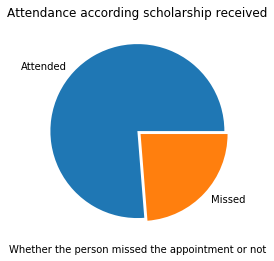

In [58]:
noshow_scholarship.plot(kind='pie', explode = [0.0, 0.05], labels = ['Attended', 'Missed'])
plt.title('Attendance according scholarship received')
plt.xlabel('Whether the person missed the appointment or not')
plt.ylabel('');

noshow_scholarship

As we can see about 0.24 of the people that receive the scholarship did not go to the appointment.

<a id='conc'></a>

## Conclusions


After answering the questions proposed I discovered that:
- although all groups of age have about the same proportion of absence, people between 10 and 30 years tend to not go to the appointments more than the other, but we cannot rightly state this;
- both men and women have the same absence proportion, but it is interesting that men do not seem be as much concerned about health as women;
- people with a disease or special condition have the same absence proportion, except for people who suffer from alcoholism, which the absence is a little bit higher than the others;
- the strategy to send a SMS regarding the appointment seems to work, considering that 0.72 of the people who have received a SMS went to the appointment;
- lastly, the people who receive a scholarship represent less than 10% of our total sample, but also in terms of proportion about 0.24 missed the appointment, which is a little higher than the others factors that I studied here.

Despite our dataset being kind of big with 110k entries, Brazil's total population is around 209 million people, in this sense, our dataset represents approximately 0.05% of the total population. In my opinion we could not make any assumptions given the size of our sample that it is very small when related with the population.

In this study it was answered several questions about different parameters of the same sample. We could consider every studied categorie as a sample of a bigger sample, in this case it would be nice to run some statistical tests to see if they are corelated to each other. As I haven't studied the statistics part of the course yet, I am not sure which would be the best test, but I guess that a t-test would be suitable.

But another interesting thing is that for every question the absence proportion is almost equal (around 0.20), which is very close to the total absence proportion of 0.2019, would it be because of the Central Limit Theorem? Considering our dataset as a population and every topic studied in the questions as a sample, we could expect that their proportional values would be close.